In [1]:
# GUI Neutral Widgets

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

In [5]:
from matplotlib.widgets import Cursor, Slider, RadioButtons, RectangleSelector

<IPython.core.display.Javascript object>


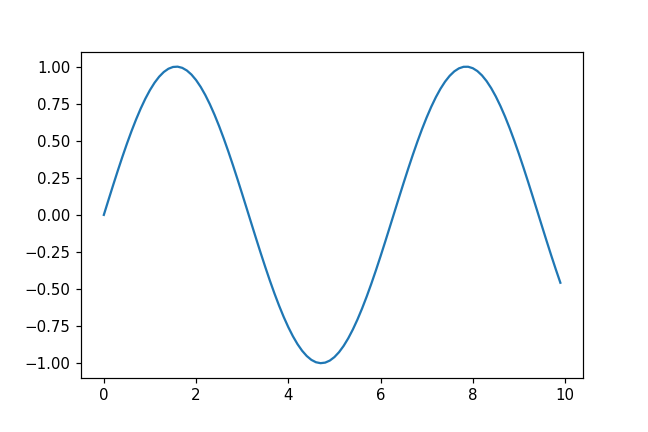

In [23]:
# Basic cursor
nums = np.arange(0,10,0.1)
plt.plot(nums, np.sin(nums))
Cursor(plt.gca(), linewidth=3, color='k')

<IPython.core.display.Javascript object>


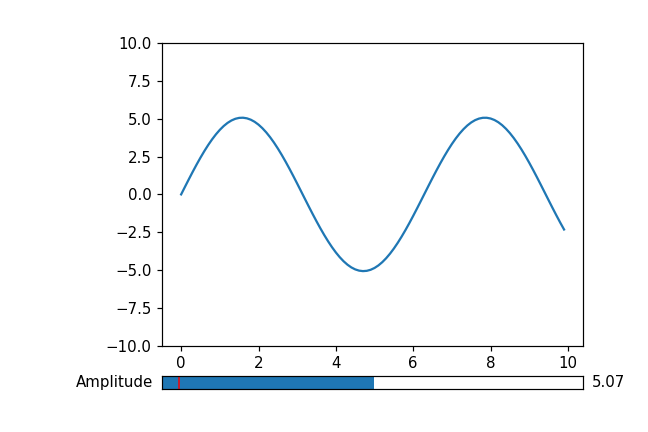

0

In [27]:
# Slider 
ax1 = plt.axes([0.25, 0.2, 0.65, 0.7])
curve, = ax1.plot(nums, np.sin(nums))
ax1.set_ylim(-10,10)
ax2 = plt.axes([0.25, 0.1, 0.65, 0.03])
amp = Slider(ax2, 'Amplitude', 0.1, 10)
def redraw(value):
    curve.set_ydata(value*np.sin(nums))
    plt.gcf().canvas.draw()
amp.on_changed(redraw)

<IPython.core.display.Javascript object>


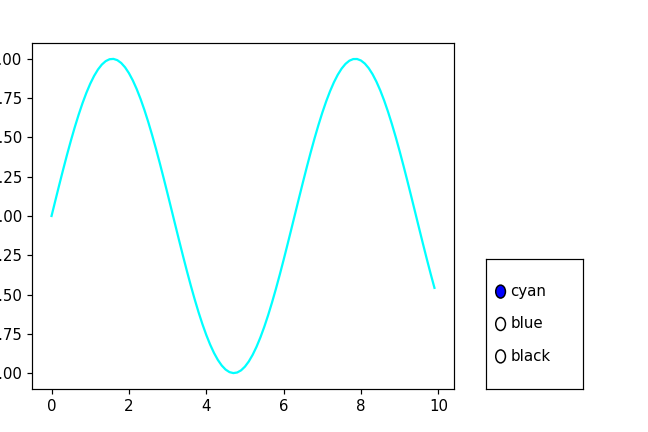

0

In [39]:
# Radio Buttons
ax1 = plt.axes([0.05, 0.1, 0.65, 0.8])
curve, = ax1.plot(nums, np.sin(nums))
ax2 = plt.axes([0.75, 0.1, 0.15, 0.3])
colors = ('cyan', 'blue', 'black')
color = RadioButtons(ax2, colors, active=1)
def setcolor(color):
    curve.set_color(color)
    plt.gcf().canvas.draw()
color.on_clicked(setcolor)

<IPython.core.display.Javascript object>


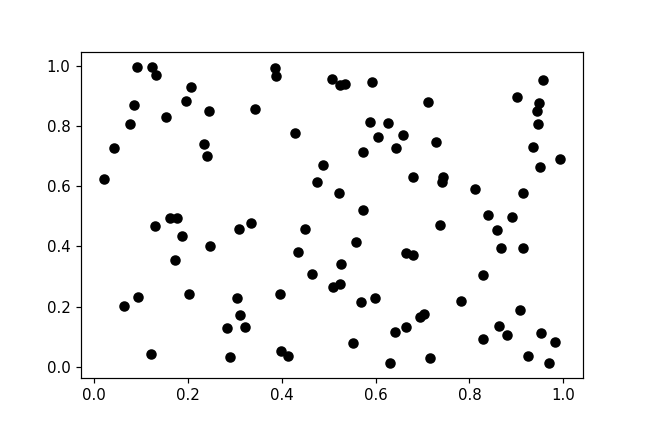

In [41]:
# Selector Widget (button, modifier keys)
ax1 = plt.subplot(111)
points, = ax1.plot(np.random.rand(100), np.random.rand(100), 'ko')
rect = RectangleSelector(ax1, onselect=None) # You can use the button keyword to select which button will 
                                            # activate the selector

<IPython.core.display.Javascript object>


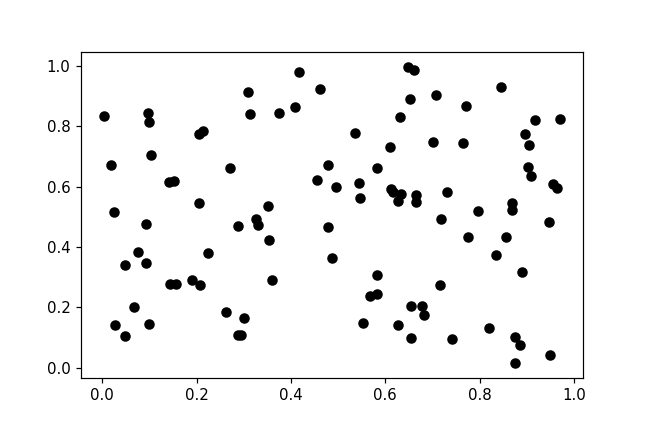

In [43]:
# Selector Widget (rectprops)
ax1 = plt.subplot(111)
points, = ax1.plot(np.random.rand(100), np.random.rand(100), 'ko')
rect = RectangleSelector(ax1, onselect=None, rectprops={'facecolor':'blue'})

<IPython.core.display.Javascript object>


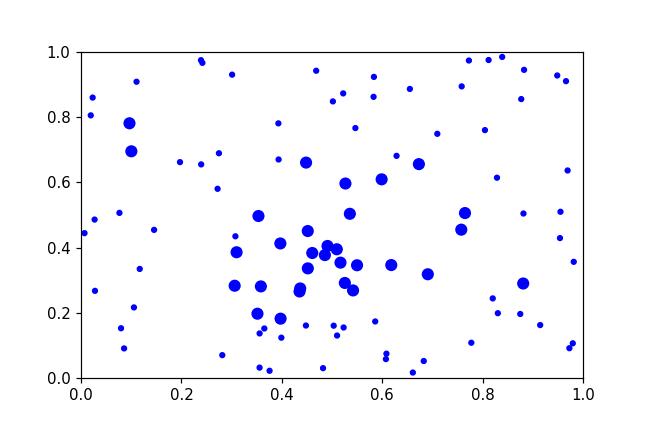

In [45]:
# Using Widgets with callbacks
ax1 = plt.subplot(111)
xpts = np.random.rand(100)
ypts = np.random.rand(100)
s = 10*np.ones(100)
points = ax1.scatter(xpts, ypts, s=s, c='b')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
def changepoints(e1, e2):
    x0, x1 = sorted([e1.xdata, e2.xdata])
    y0, y1 = sorted([e1.ydata, e2.ydata])
    sizes = points.get_sizes()
    sizes[np.where((xpts > x0) & (xpts < x1) & (ypts > y0) & (ypts < y1))] = 50
    points.set_sizes(sizes)
    plt.gcf().canvas.draw()
rect = RectangleSelector(ax1, onselect=changepoints)